## Exercise 7: Extra Credit

## Q4 (b)

In [9]:
%load_ext autoreload
%autoreload 2
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import algorithms_mountain_car
from matplotlib import cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
mountain_car = gym.make('MountainCar-v0', render_mode = 'rgb_array', max_episode_steps=1000)

KeyboardInterrupt: 

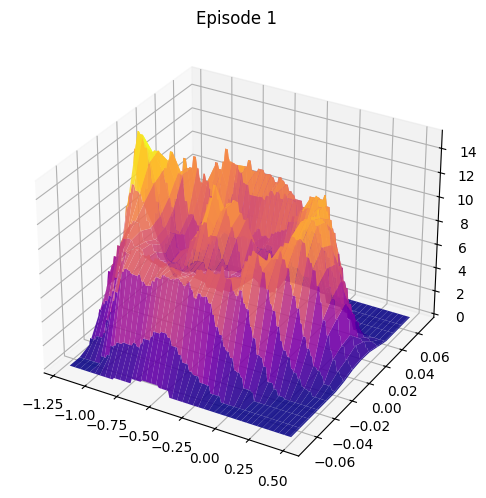

In [40]:
episodes = [1, 12]
pos_range = np.arange(-1.2, 0.5, 0.01)
vel_range = np.arange(-0.07, 0.07, 0.01)
X = pos_range
Y = vel_range
X, Y = np.meshgrid(X, Y)

cost_to_go = np.ndarray([len(vel_range), len(pos_range)])
fig = plt.figure(figsize= (15, 20))

for idx_e, e in enumerate(episodes):
    w, _ = algorithms_mountain_car.n_step_sarsa(mountain_car, 
                                            gamma = 1,
                                            num_episodes = e,
                                            eps = 0,
                                            alpha = (0.5/8),
                                            n = 4)
    
    for row, vel in enumerate(vel_range):
        for col, pos in enumerate(pos_range):
            q_vals = [algorithms_mountain_car.get_approx_q((pos, vel), a, w) for a in [0, 1, 2]]
            cost_to_go[row, col] = -max(q_vals)

            
    ax = fig.add_subplot(3, 2, idx_e+1, projection='3d')
    Z = cost_to_go
    ax.plot_surface(X, Y, Z, alpha = 0.9, antialiased = True, cmap=cm.plasma)
    ax.set_title(f"Episode {e}")

plt.suptitle("Cost to go function ($-max_{a}q(s, a, w)$()")
plt.show()